**PROJECT: CUSTOMER CHURN PREDICTION**

We have to create a machine learning model that predicts whether a customer will churn (leave the service) or not, using the provided dataset. The dataset contains various features about customers such as demographic information, services they subscribe to, and their billing information.

**TASK 1: Data Understanding and Exploratory Data Analysis (EDA)**

**1. Understand the Dataset:**


The dataset for customer churn prediction includes customer demographics, service subscriptions, contract details, payment information, and the target variable Churn (Yes/No). There's one missing value in the Churn column, and the data is a mix of categorical and numerical features, suitable for churn prediction analysis.

**IMPORTING THE LIBRARIES**

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
warnings.filterwarnings('ignore')

IMPORTING THE DATASET

In [93]:
data=pd.read_csv("./Curstomer Chrun.csv")

In [94]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [95]:
print(f"There are {data.shape[0]} rows")
print(f"There are {data.shape[1]} cols")

There are 360 rows
There are 21 cols


In [96]:
data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        360 non-null    object 
 1   gender            360 non-null    object 
 2   SeniorCitizen     360 non-null    int64  
 3   Partner           360 non-null    object 
 4   Dependents        360 non-null    object 
 5   tenure            360 non-null    int64  
 6   PhoneService      360 non-null    object 
 7   MultipleLines     360 non-null    object 
 8   InternetService   360 non-null    object 
 9   OnlineSecurity    360 non-null    object 
 10  OnlineBackup      360 non-null    object 
 11  DeviceProtection  360 non-null    object 
 12  TechSupport       360 non-null    object 
 13  StreamingTV       360 non-null    object 
 14  StreamingMovies   360 non-null    object 
 15  Contract          360 non-null    object 
 16  PaperlessBilling  360 non-null    object 
 1

Churn Distribution:
 Churn
No     73.816156
Yes    26.183844
Name: proportion, dtype: float64


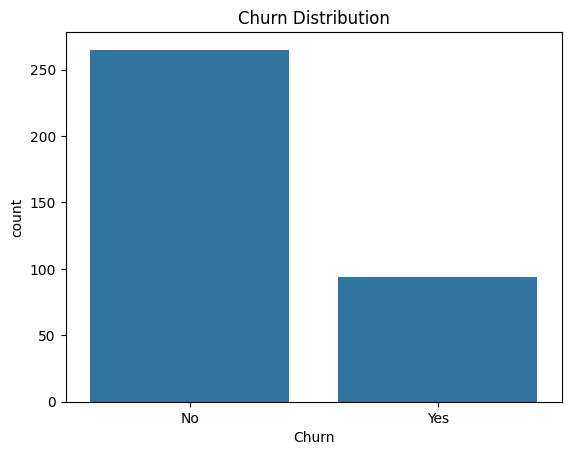

In [98]:
# Distribution of the target variable
churn_count_in_data= data['Churn'].value_counts(normalize=True) * 100
print("Churn Distribution:\n", churn_count_in_data)

# Visualize the churn distribution
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.show()

In [99]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [100]:
#check for duplicates
print(f'Known observations: {len(data.index)} \nUnique observations: { len(data.drop_duplicates().index) }')
print("No duplicates Found!")

Known observations: 360 
Unique observations: 360
No duplicates Found!


**2. Handle Missing or Incorrect Data:**

In [101]:
#check for missing value
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               1
dtype: int64


There is one value missing i.e. the churn value in the last row. As there is only one such value we can drop it. When the missing value in data is less we can delete that entry.

In [102]:
#deleting the last row
last_row = len(data)
if last_row == 360:
   data = data.drop(data.index[last_row-1])
else:
   print("Last row is already deleted")

In [103]:
print(f"There are {data.shape[0]} rows")
print(f"There are {data.shape[1]} cols")

There are 359 rows
There are 21 cols


In [104]:
#check for missing value
print(data.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


Now we don't have any missing values.

In [105]:
# Converting TotalCharges to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Impute missing TotalCharges with the median
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)



In [106]:
#drop unwanted data i.e. the customer ID
if 'customerID' in data.columns:
   data = data.drop(['customerID'], axis = 1)
else:
  print("Column 'customerID' is already dropped from the Data")

data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**3. Insights:**

There are three numerical values which can be ranked.
They are Tenure, Monthly charges and Total charges.


In [107]:
def makehist_feature(feature):
    plt.hist(data[feature])
    plt.xlabel(f"{feature.title()}")
    plt.ylabel("Count")
    plt.title(f"{feature.title()} Bins")
    plt.show()

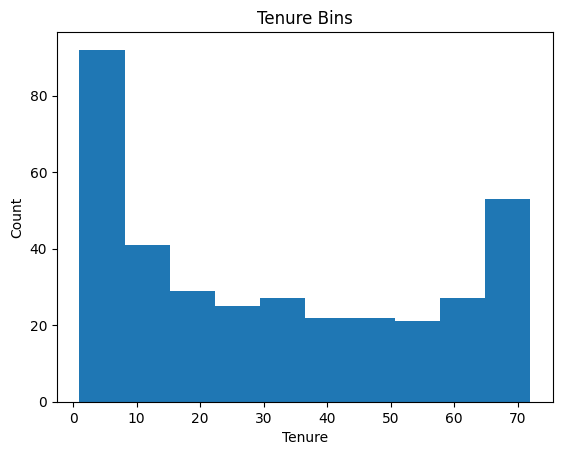

In [108]:
makehist_feature('tenure')

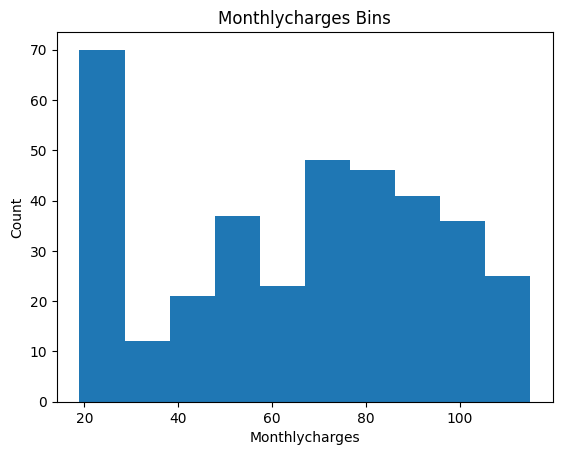

In [109]:
makehist_feature('MonthlyCharges')

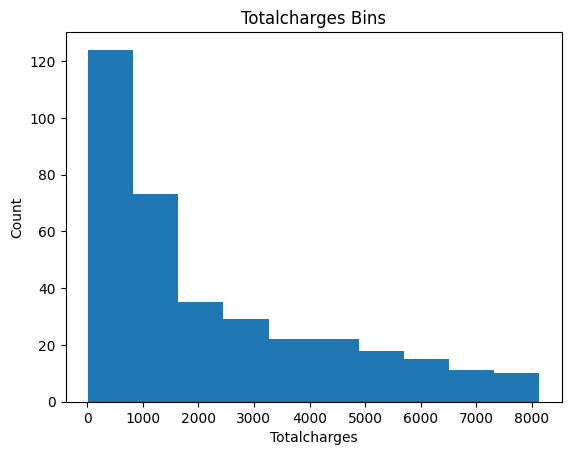

In [110]:
makehist_feature("TotalCharges")

The distribution of customer tenure shows a right-skewed pattern, indicating that many customers have shorter tenures and fewer customers have been with the company for a longer duration.

The distribution of monthly charges appears relatively uniform, showing a range of monthly fees paid by customers.

The distribution of total charges also shows a right-skewed pattern.

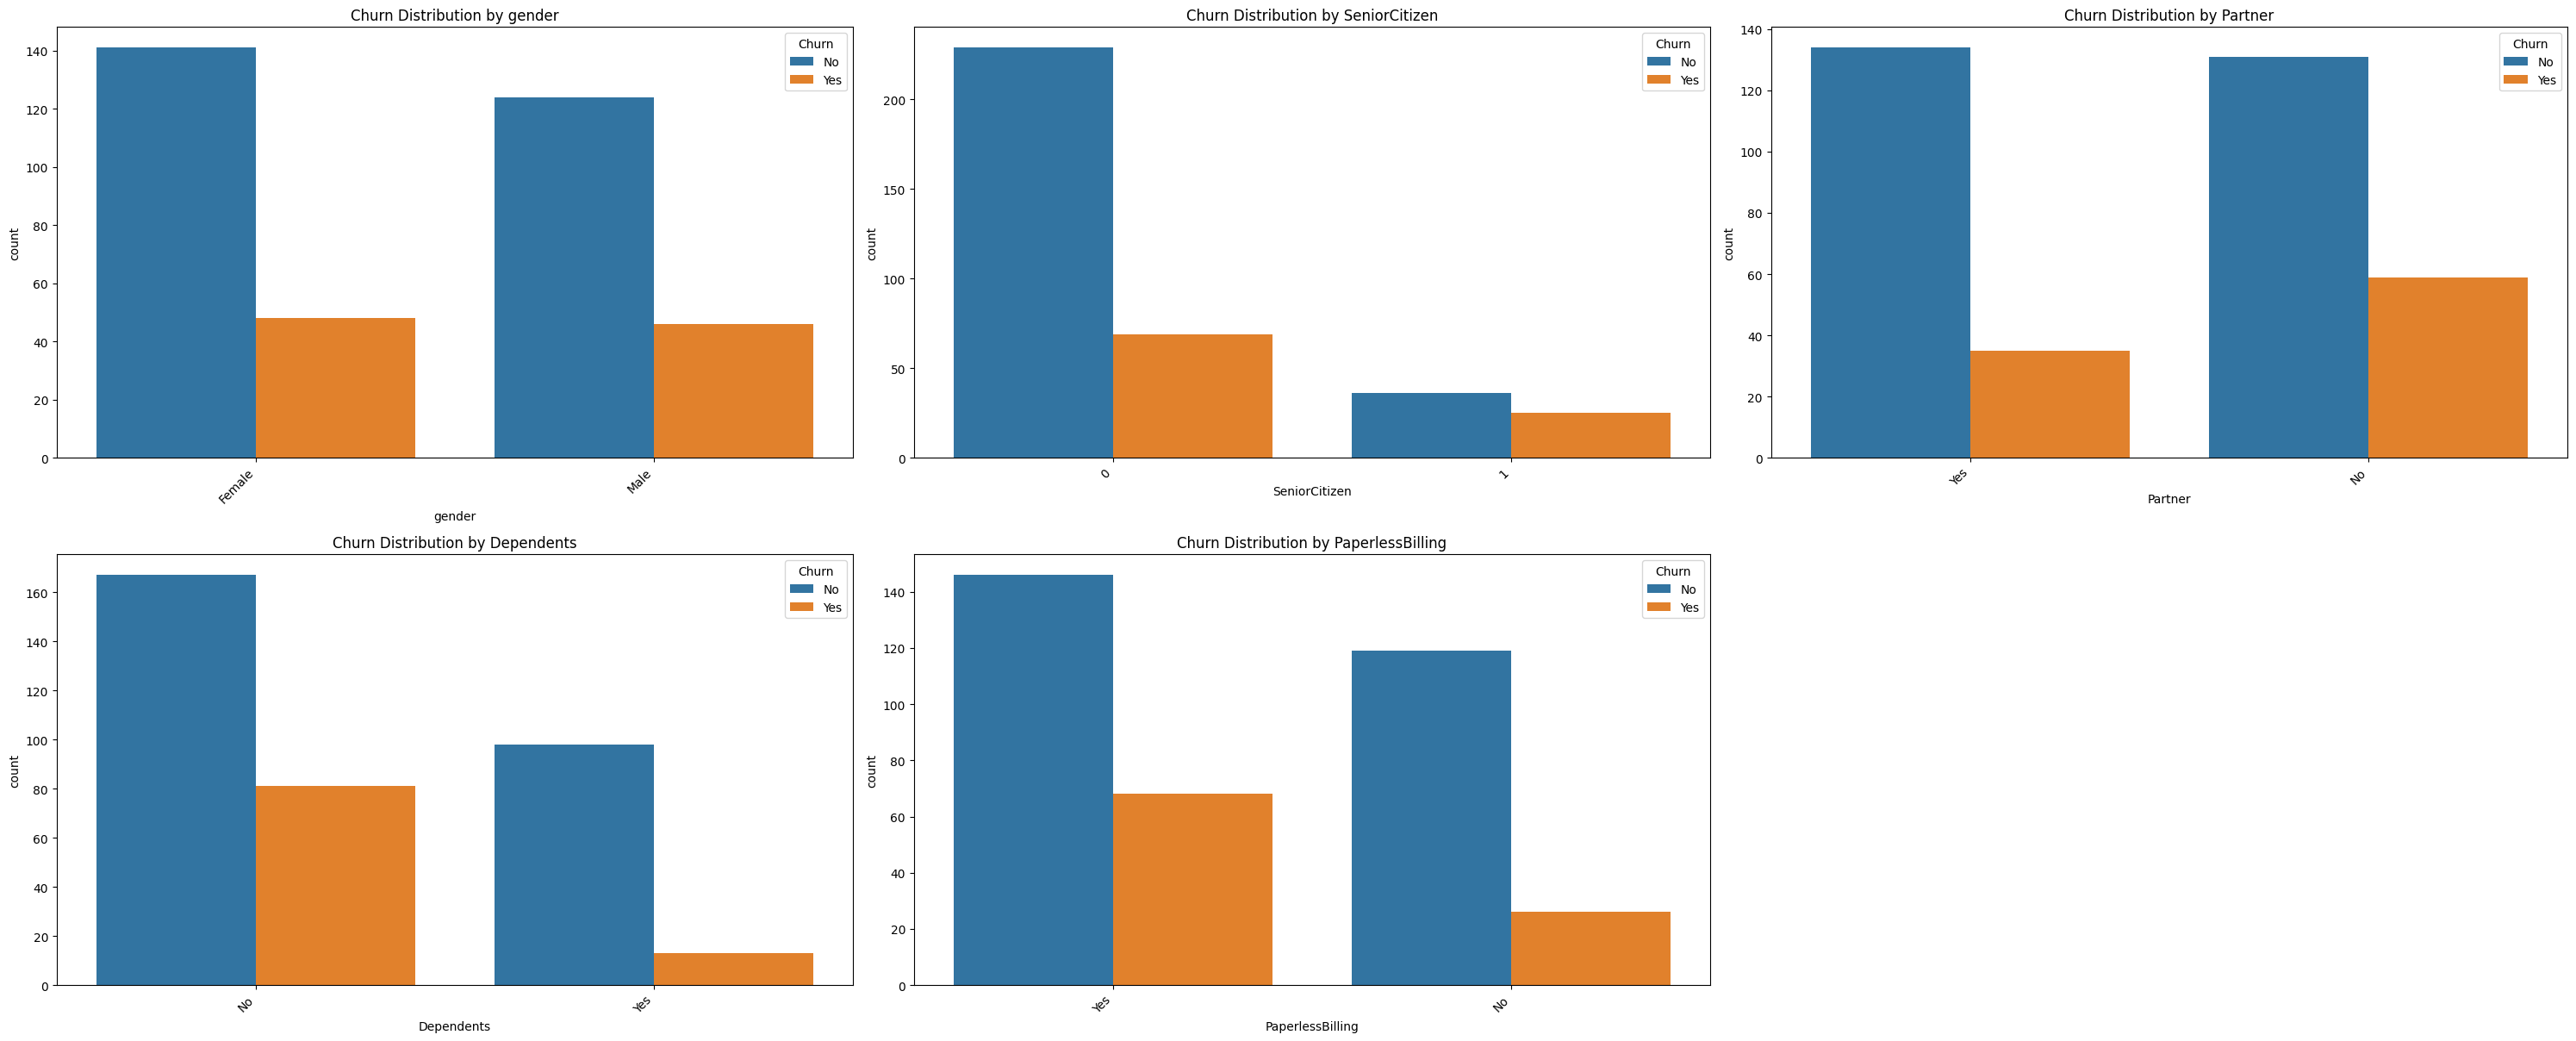

In [111]:
features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling']

plt.figure(figsize=(30, 30))

for i, feature in enumerate(features):
    plt.subplot(5, 3, i + 1)
    sns.countplot(x=feature, hue='Churn', data=data)
    plt.title(f'Churn Distribution by {feature}')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

The gender ratio is 50-50 and the churn rate between males and females is relatively similar

The senior citizens have a higher churn rate.

The cutomers who are married are less prone to churn.

The customer with dependents are less likely to churn.


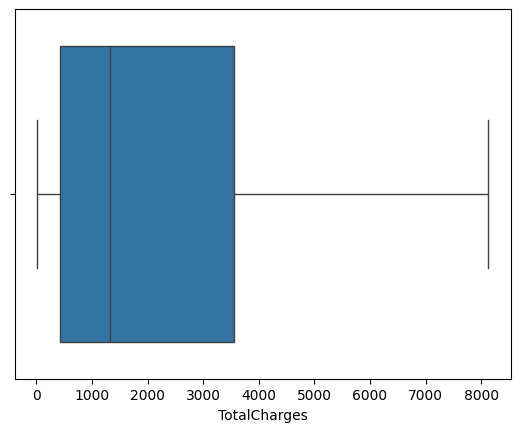

In [112]:
sns.boxplot(x=data["TotalCharges"])
plt.show()

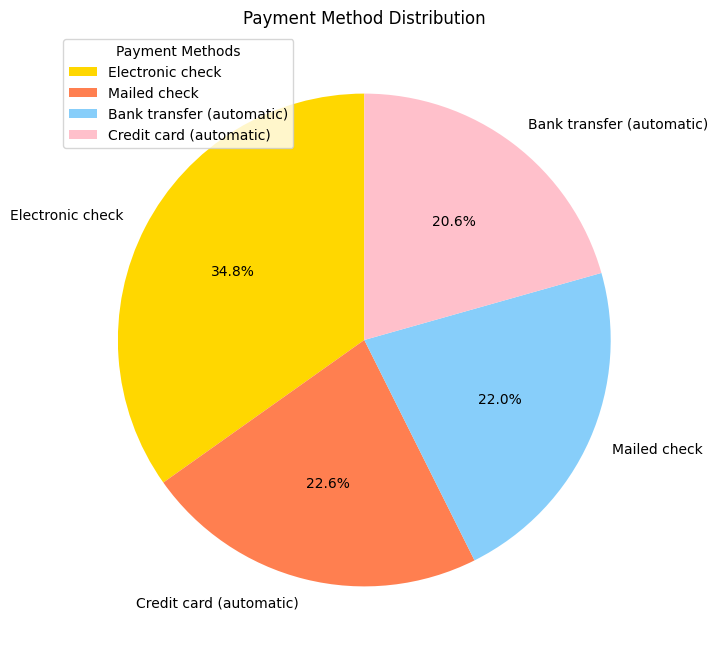

In [113]:
# Payment Method Distribution
payment_method_counts = data['PaymentMethod'].value_counts()

# Define colors for each payment method
colors = ['gold', 'coral', 'lightskyblue', 'pink']

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(payment_method_counts, labels=payment_method_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Payment Method Distribution')
plt.legend(title='Payment Methods', labels=['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'], loc='best')
plt.show()


We can see that majority of customers use Electronic check






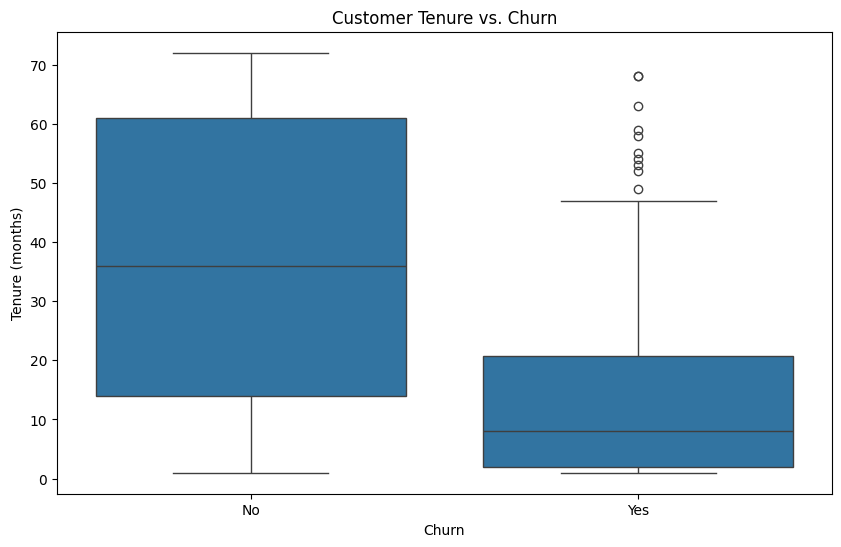

In [114]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=data)
plt.title('Customer Tenure vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure (months)')
plt.show()


The box plot suggests a strong relationship between customer tenure and churn.Customers who have been with the company for a shorter period are more likely to churn.


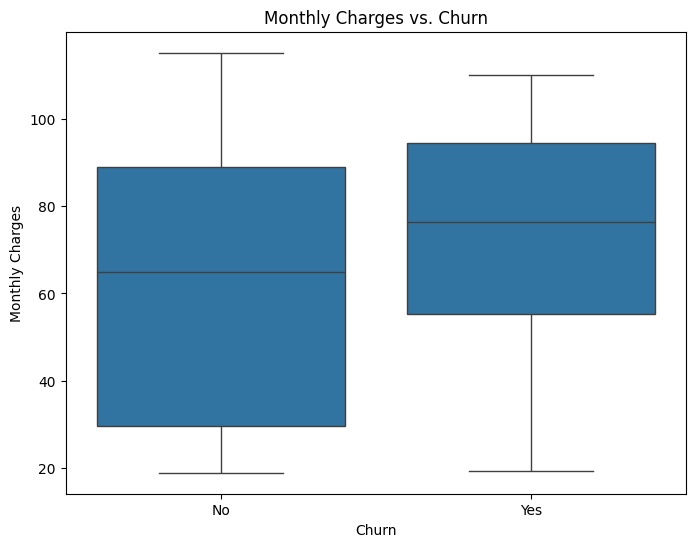

In [115]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title('Monthly Charges vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

The customers who churn tend to have higher monthly charges compared to those who don't churn. The company may want to consider pricing strategies and customer retention efforts for customers with higher monthly charges to mitigate churn.

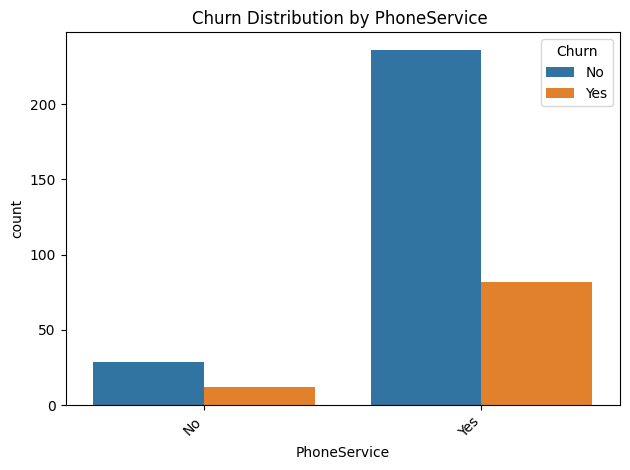

In [116]:
sns.countplot(x='PhoneService', hue='Churn', data=data)
plt.title(f'Churn Distribution by PhoneService ')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

The majority of customers who have Phone service do not churn, but within the group of customers with Phone service, a noticeable number of them still churned.

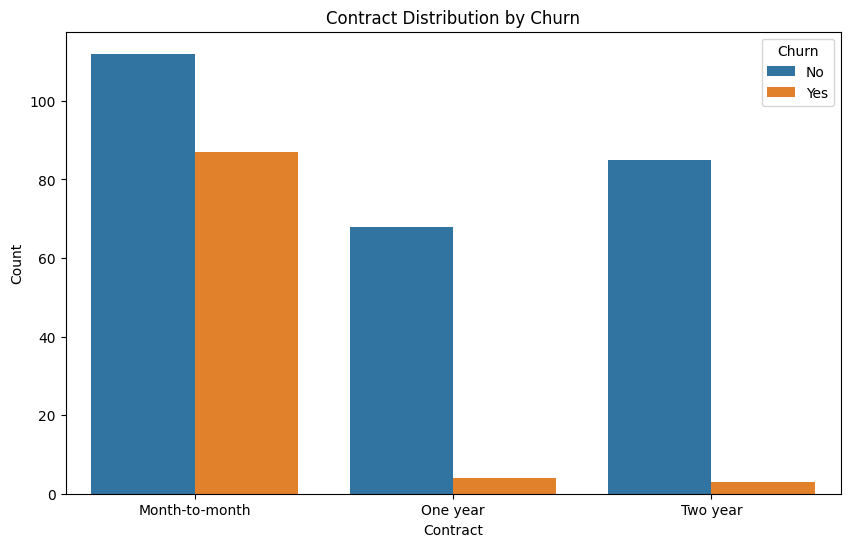

In [117]:
plt.figure(figsize=(10,6),dpi=100)
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Contract Distribution by Churn')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.show()

Most churned users has Month-to-month contract

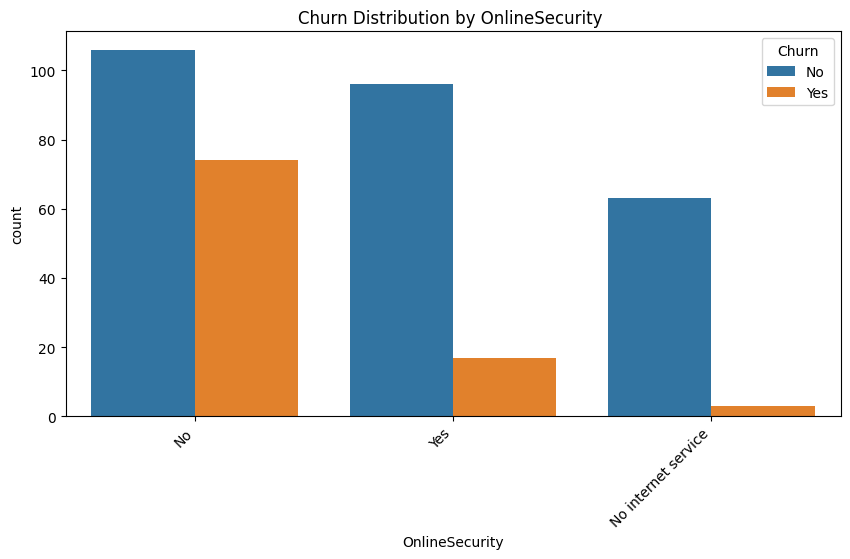

In [118]:
plt.figure(figsize=(10, 5))
sns.countplot(x='OnlineSecurity', hue='Churn', data=data)
plt.title(f'Churn Distribution by OnlineSecurity ')
plt.xticks(rotation=45, ha='right')
plt.show()

Most churned users didn't have online security

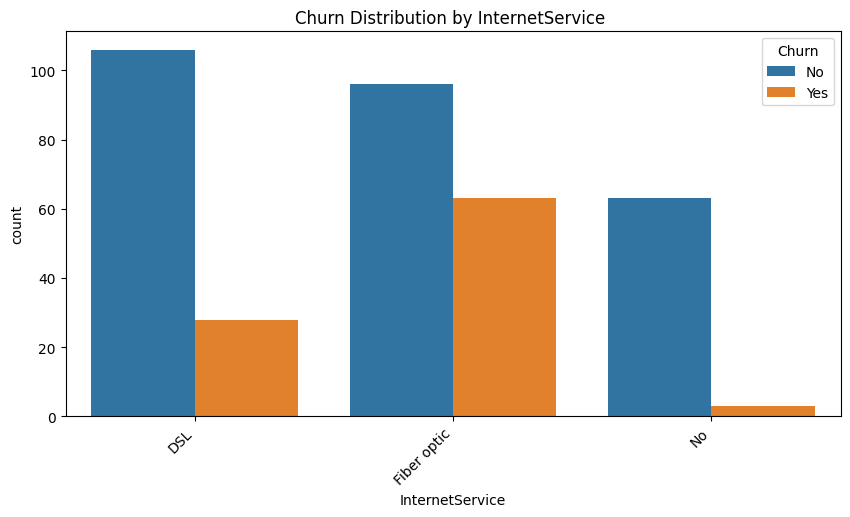

In [119]:
plt.figure(figsize=(10, 5))
sns.countplot(x='InternetService', hue='Churn', data=data)
plt.title(f'Churn Distribution by InternetService ')
plt.xticks(rotation=45, ha='right')
plt.show()

The customers with Fiber optic internet service might be more prone to switching providers.


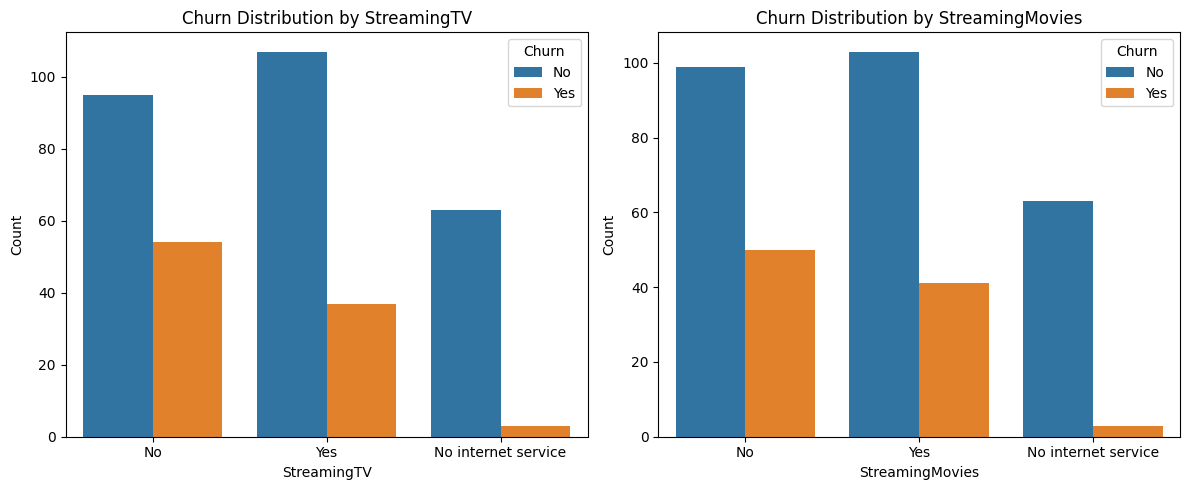

In [120]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='StreamingTV', hue='Churn', data=data)
plt.title('Churn Distribution by StreamingTV')
plt.xlabel('StreamingTV')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='StreamingMovies', hue='Churn', data=data)
plt.title('Churn Distribution by StreamingMovies')
plt.xlabel('StreamingMovies')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

Customers with StreamingTV seem to have a slightly lower churn rate.

Customers with StreamingMovies also appear to have a slightly lower churn rate compared to those without it.

Customers who subscribe to both StreamingTV and StreamingMovies might be less inclined to churn compared to those who don't have either service. This could indicate that these streaming services contribute to customer satisfaction and retention.

It's possible that customers who are using these streaming services are more engaged and satisfied with the service offered, making them less likely to switch providers.

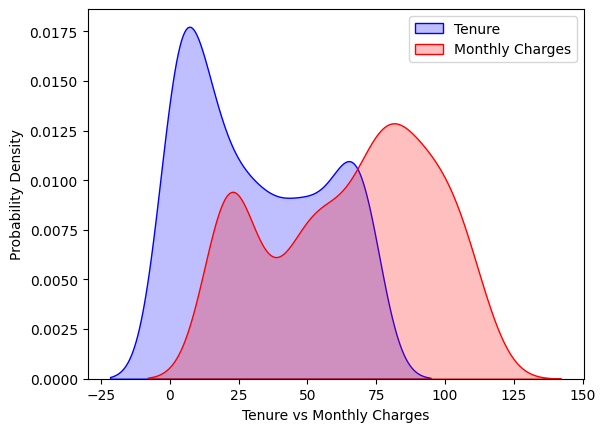

In [121]:
sns.kdeplot(data.tenure, color='b', shade=True)
sns.kdeplot(data.MonthlyCharges, color='r', shade=True)
plt.xlabel('Tenure vs Monthly Charges')
plt.ylabel('Probability Density')
plt.legend(['Tenure', 'Monthly Charges'])
plt.show()

Customers with higher Monthly Charges are also more likely to churn.

**Task 2: Data Preprocessing and Feature Engineering**

**Feature Encoding:**

In [122]:
from sklearn.preprocessing import LabelEncoder

In [123]:
encoders = {}
def object_to_numeral(dataframe_series):
    if dataframe_series.dtype=='object':
        encoder = LabelEncoder()
        encoder_name = dataframe_series.name
        dataframe_series = encoder.fit_transform(dataframe_series)
        encoders[encoder_name] = encoder
    return dataframe_series

In [124]:
data = data.apply(lambda x: object_to_numeral(x))
joblib.dump(encoders, 'models/encoders.pkl')
data.head()



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [125]:
X = data.drop(columns = ['Churn'])
y = data['Churn'].values

In [126]:
y

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [127]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            359 non-null    int64  
 1   SeniorCitizen     359 non-null    int64  
 2   Partner           359 non-null    int64  
 3   Dependents        359 non-null    int64  
 4   tenure            359 non-null    int64  
 5   PhoneService      359 non-null    int64  
 6   MultipleLines     359 non-null    int64  
 7   InternetService   359 non-null    int64  
 8   OnlineSecurity    359 non-null    int64  
 9   OnlineBackup      359 non-null    int64  
 10  DeviceProtection  359 non-null    int64  
 11  TechSupport       359 non-null    int64  
 12  StreamingTV       359 non-null    int64  
 13  StreamingMovies   359 non-null    int64  
 14  Contract          359 non-null    int64  
 15  PaperlessBilling  359 non-null    int64  
 16  PaymentMethod     359 non-null    int64  
 1

**2. Feature Scaling:**

We should perform feature scaling after splitting the dataset into training set and test set, because a test set is not supposed be aware of the nature of the train dataset. If we perform the feature scaling before splitting we will consider the values of test dataset also to find the Mean and Standard Deviation which is kind of information leak.

**3. Feature Engineering:**

In [128]:
# Create a new feature 'StreamingServices' to check if customer has both StreamingTV and StreamingMovies

if 'StreamingServices' in data.columns:
   print("Column 'StreamingServices' is already added in the Data")
else:
  data['StreamingServices'] = (data['StreamingTV'] == 1) & (data['StreamingMovies'] == 1)
  data['StreamingServices'] = data['StreamingServices'].astype(int)

# Create a new feature 'HasOnlineSecurityAndProtection' to check if customer has both OnlineSecurity and OnlineBackup

if 'HasOnlineSecurityAndProtection' in data.columns:
   print("Column 'HasOnlineSecurityAndProtection' is already added in the Data")
else:
  data['HasOnlineSecurityAndProtection'] = (data['OnlineSecurity'] == 1) & (data['OnlineBackup'] == 1)
  data['HasOnlineSecurityAndProtection'] = data['HasOnlineSecurityAndProtection'].astype(int)

# Create a new feature 'AvgMonthlyCharge'
data['AverageMonthlyCharge'] = data['TotalCharges'] / data['tenure']

# Replace infinity values with NaN and then fill with median.
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data['AverageMonthlyCharge'].fillna(data['AverageMonthlyCharge'].median(), inplace=True)

data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,StreamingServices,HasOnlineSecurityAndProtection,AverageMonthlyCharge
0,0,0,1,0,1,0,1,0,0,2,...,0,0,1,2,29.85,29.85,0,0,0,29.850000
1,1,0,0,0,34,1,0,0,2,0,...,0,1,0,3,56.95,1889.50,0,0,0,55.573529
2,1,0,0,0,2,1,0,0,2,2,...,0,0,1,3,53.85,108.15,1,0,0,54.075000
3,1,0,0,0,45,0,1,0,2,0,...,0,1,0,0,42.30,1840.75,0,0,0,40.905556
4,0,0,0,0,2,1,0,1,0,0,...,0,0,1,2,70.70,151.65,1,0,0,75.825000


In [129]:
X = data.drop(columns = ['Churn'])
y = data['Churn'].values

**Task 3: Train-Test Split and Model Building**

**1. Train-Test Split:**

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [131]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,StreamingServices,HasOnlineSecurityAndProtection,AverageMonthlyCharge
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,1,2,29.85,29.85,0,0,29.850000
1,1,0,0,0,34,1,0,0,2,0,...,0,0,1,0,3,56.95,1889.50,0,0,55.573529
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,1,3,53.85,108.15,0,0,54.075000
3,1,0,0,0,45,0,1,0,2,0,...,0,0,1,0,0,42.30,1840.75,0,0,40.905556
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,1,2,70.70,151.65,0,0,75.825000


 We divide the columns into 3 categories, one for standardisation, one for label encoding and one for one hot encoding

In [132]:
from sklearn.preprocessing import StandardScaler

In [133]:
numeral_cols = ["tenure", 'MonthlyCharges', 'TotalCharges','AverageMonthlyCharge']
data_std = pd.DataFrame(StandardScaler().fit_transform(data[numeral_cols].astype('float64')),
                       columns=numeral_cols)

categorical_col_onehot =['PaymentMethod', 'Contract', 'InternetService'] # need one-hot encoding
categorical_col_label = list(set(X_train.columns)- set(numeral_cols) - set(categorical_col_onehot)) # need label encoding

In [134]:
scaler= StandardScaler()

X_train[numeral_cols] = scaler.fit_transform(X_train[numeral_cols])
X_test[numeral_cols] = scaler.transform(X_test[numeral_cols])
joblib.dump(scaler, 'models/scaler.pkl')

['models/scaler.pkl']

In [135]:
X_train.head()
print(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 287 entries, 289 to 102
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          287 non-null    int64  
 1   SeniorCitizen                   287 non-null    int64  
 2   Partner                         287 non-null    int64  
 3   Dependents                      287 non-null    int64  
 4   tenure                          287 non-null    float64
 5   PhoneService                    287 non-null    int64  
 6   MultipleLines                   287 non-null    int64  
 7   InternetService                 287 non-null    int64  
 8   OnlineSecurity                  287 non-null    int64  
 9   OnlineBackup                    287 non-null    int64  
 10  DeviceProtection                287 non-null    int64  
 11  TechSupport                     287 non-null    int64  
 12  StreamingTV                     287 non

**2.	Model Selection:**

**Logistic Regression**

[[49  3]
 [ 7 13]]
Accuracy: 0.8611111111111112 
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        52
           1       0.81      0.65      0.72        20

    accuracy                           0.86        72
   macro avg       0.84      0.80      0.81        72
weighted avg       0.86      0.86      0.86        72

Precision: 0.8125
Recall: 0.65
F1: 0.7222222222222222
ROC-AUC: 0.9403846153846154


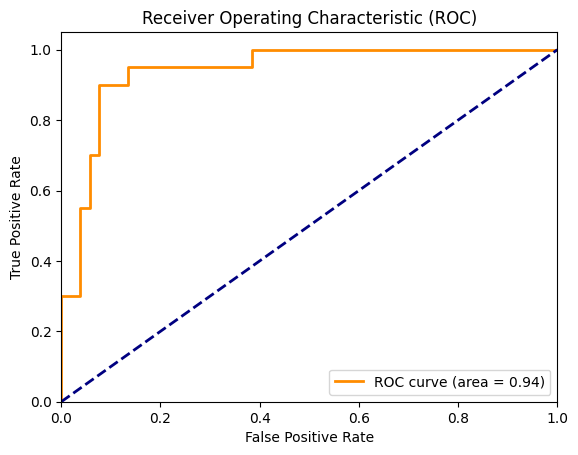

In [136]:
# Training the Logistic Regression model on the Training set
from sklearn.metrics import recall_score, confusion_matrix,accuracy_score, precision_score, f1_score, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(f"Accuracy: {accuracy_score(y_test, y_pred)} ")

print(classification_report(y_test, y_pred))

# Precision, Recall, F1
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
print(f"Precision: {precision}\nRecall: {recall}\nF1: {f1}")

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1])
print(f"ROC-AUC: {roc_auc}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

**KNN**

[[44  8]
 [ 8 12]]
Accuracy: 0.7777777777777778 
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        52
           1       0.60      0.60      0.60        20

    accuracy                           0.78        72
   macro avg       0.72      0.72      0.72        72
weighted avg       0.78      0.78      0.78        72

Precision: 0.6
Recall: 0.6
F1: 0.6
ROC-AUC: 0.8471153846153846


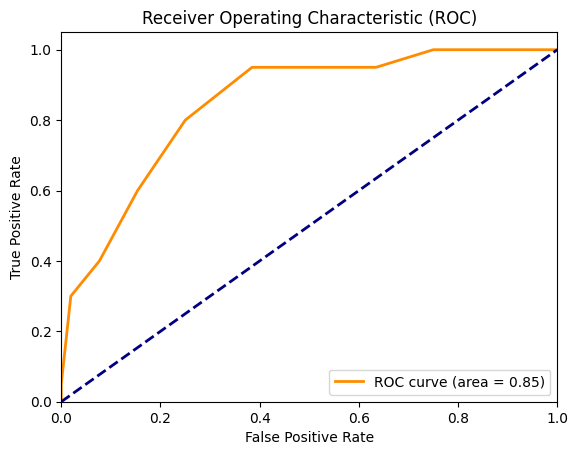

In [137]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 11, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(f"Accuracy: {accuracy_score(y_test, y_pred)} ")

print(classification_report(y_test, y_pred))

# Precision, Recall, F1
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
print(f"Precision: {precision}\nRecall: {recall}\nF1: {f1}")

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1])
print(f"ROC-AUC: {roc_auc}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

**SVC**

[[50  2]
 [ 8 12]]
Accuracy: 0.8611111111111112 
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        52
           1       0.86      0.60      0.71        20

    accuracy                           0.86        72
   macro avg       0.86      0.78      0.81        72
weighted avg       0.86      0.86      0.85        72

Precision: 0.8571428571428571
Recall: 0.6
F1: 0.7058823529411765
ROC-AUC: 0.9211538461538461


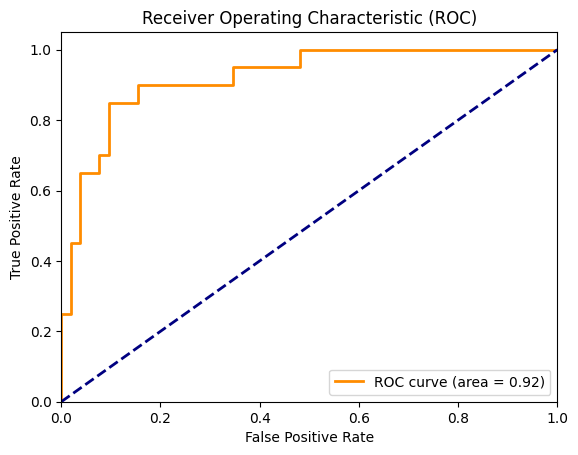

In [138]:
# Training the SVM model on the Training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state = 45,probability=True)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(f"Accuracy: {accuracy_score(y_test, y_pred)} ")

print(classification_report(y_test, y_pred))

# Precision, Recall, F1
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
print(f"Precision: {precision}\nRecall: {recall}\nF1: {f1}")

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1])
print(f"ROC-AUC: {roc_auc}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()



**Naive Bayes**

[[32 20]
 [ 1 19]]
Accuracy: 0.7083333333333334 
              precision    recall  f1-score   support

           0       0.97      0.62      0.75        52
           1       0.49      0.95      0.64        20

    accuracy                           0.71        72
   macro avg       0.73      0.78      0.70        72
weighted avg       0.84      0.71      0.72        72

Precision: 0.48717948717948717
Recall: 0.95
F1: 0.6440677966101694
ROC-AUC: 0.8884615384615385


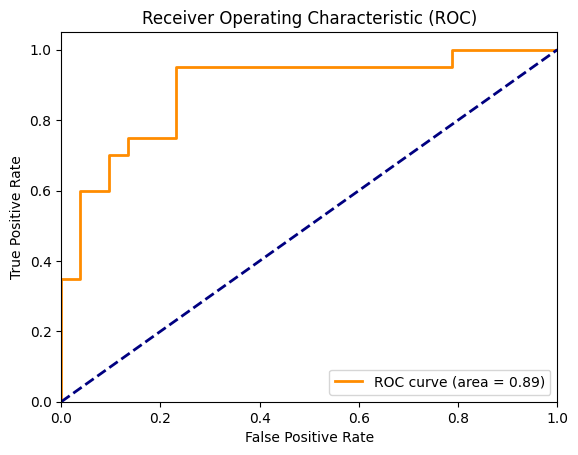

In [139]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(f"Accuracy: {accuracy_score(y_test, y_pred)} ")

print(classification_report(y_test, y_pred))

# Precision, Recall, F1
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
print(f"Precision: {precision}\nRecall: {recall}\nF1: {f1}")

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1])
print(f"ROC-AUC: {roc_auc}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

**Decision Tree**

[[34 18]
 [ 8 12]]
Accuracy: 0.6388888888888888 
              precision    recall  f1-score   support

           0       0.81      0.65      0.72        52
           1       0.40      0.60      0.48        20

    accuracy                           0.64        72
   macro avg       0.60      0.63      0.60        72
weighted avg       0.70      0.64      0.66        72

Precision: 0.6957671957671958
Recall: 0.6388888888888888
F1: 0.655791962174941
ROC-AUC: 0.6269230769230769


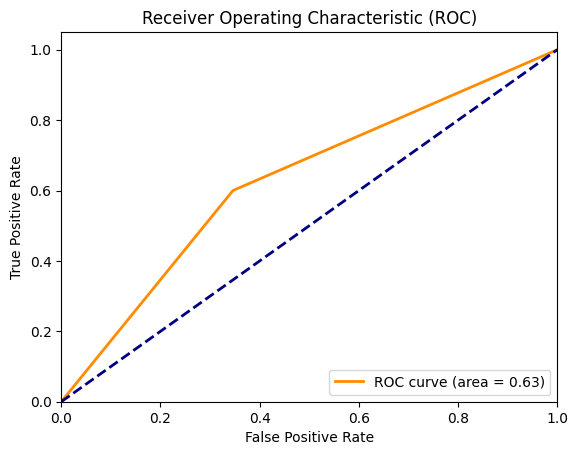

In [140]:
# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(f"Accuracy: {accuracy_score(y_test, y_pred)} ")

print(classification_report(y_test, y_pred))

# Precision, Recall, F1
precision = precision_score(y_test, y_pred,average='weighted' )
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}\nRecall: {recall}\nF1: {f1}")

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1])
print(f"ROC-AUC: {roc_auc}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

**Random Forest**

[[46  6]
 [ 9 11]]
Accuracy: 0.7916666666666666 
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        52
           1       0.65      0.55      0.59        20

    accuracy                           0.79        72
   macro avg       0.74      0.72      0.73        72
weighted avg       0.78      0.79      0.79        72

Precision: 0.6470588235294118
Recall: 0.55
F1: 0.5945945945945946
ROC-AUC: 0.86875


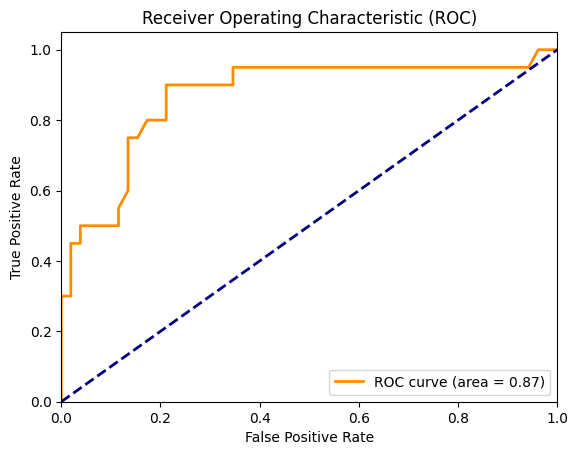

In [141]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(f"Accuracy: {accuracy_score(y_test, y_pred)} ")

print(classification_report(y_test, y_pred))

# Precision, Recall, F1
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')
print(f"Precision: {precision}\nRecall: {recall}\nF1: {f1}")

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1])
print(f"ROC-AUC: {roc_auc}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


[[44  8]
 [ 8 12]]
Accuracy: 0.7777777777777778 
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        52
           1       0.60      0.60      0.60        20

    accuracy                           0.78        72
   macro avg       0.72      0.72      0.72        72
weighted avg       0.78      0.78      0.78        72

Precision: 0.7777777777777778
Recall: 0.7777777777777778
F1: 0.7777777777777778
ROC-AUC: 0.8572115384615384


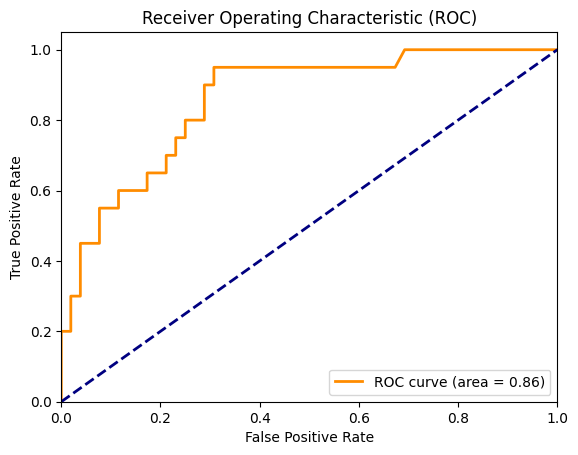

In [142]:
# Training the Gradient Boosting Classification model on the Training set
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

print(f"Accuracy: {accuracy_score(y_test, y_pred)} ")

print(classification_report(y_test, y_pred))

# Precision, Recall, F1
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision}\nRecall: {recall}\nF1: {f1}")

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, classifier.predict_proba(X_test)[:,1])
print(f"ROC-AUC: {roc_auc}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Out of all the classifiers SVM is giving the maximum accuracy so we will use SVC to train our model

In [143]:
# Training the Kernel SVM model on the Training set

best_classifier = SVC(kernel = 'rbf', probability=True, random_state = 0)
best_classifier.fit(X_train, y_train)

# Predicting the Test set results
final_y_pred = best_classifier.predict(X_test)

**Task 4: Model Evaluation**

In [144]:
# Making the Confusion Matrix
cm = confusion_matrix(y_test, final_y_pred)
print(cm)
accuracy_score(y_test, final_y_pred)

print(classification_report(y_test, final_y_pred))


[[50  2]
 [ 8 12]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        52
           1       0.86      0.60      0.71        20

    accuracy                           0.86        72
   macro avg       0.86      0.78      0.81        72
weighted avg       0.86      0.86      0.85        72



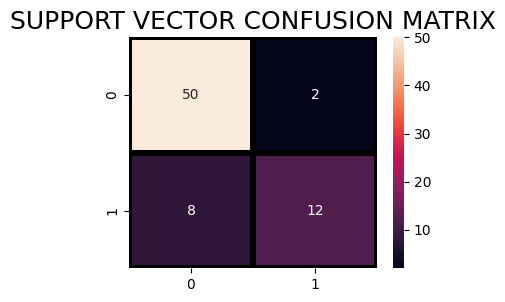

True Negative  : 50 
False Negative : 8 
True Positive  : 12 
False Positive : 2 
Accuracy       : 0.8611111111111112
Precision      : 0.8571428571428571
Recall         : 0.6
F1 Score       : 0.7058823529411764


In [145]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, final_y_pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)

plt.title("SUPPORT VECTOR CONFUSION MATRIX",fontsize=18)
plt.show()

TN = cm[0, 0]  # True Negative
FP = cm[0, 1]  # False Positive
FN = cm[1, 0]  # False Negative
TP = cm[1, 1]  # True Positive

accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"True Negative  : {TN} ")
print(f"False Negative : {FN} ")
print(f"True Positive  : {TP} ")
print(f"False Positive : {FP} ")
print(f"Accuracy       : {accuracy}")
print(f"Precision      : {precision}")
print(f"Recall         : {recall}")
print(f"F1 Score       : {f1_score}")

Feature ranking for Random Forest:
1. feature 14 (0.190045)
2. feature 18 (0.179655)
3. feature 21 (0.158963)
4. feature 17 (0.140301)
5. feature 4 (0.106890)
6. feature 11 (0.067413)
7. feature 16 (0.037125)
8. feature 8 (0.031774)
9. feature 0 (0.015153)
10. feature 9 (0.014973)
11. feature 1 (0.013795)
12. feature 6 (0.010021)
13. feature 15 (0.009460)
14. feature 3 (0.006155)
15. feature 10 (0.005753)
16. feature 12 (0.003045)
17. feature 5 (0.002473)
18. feature 2 (0.002075)
19. feature 13 (0.001891)
20. feature 19 (0.001231)
21. feature 7 (0.001036)
22. feature 20 (0.000772)


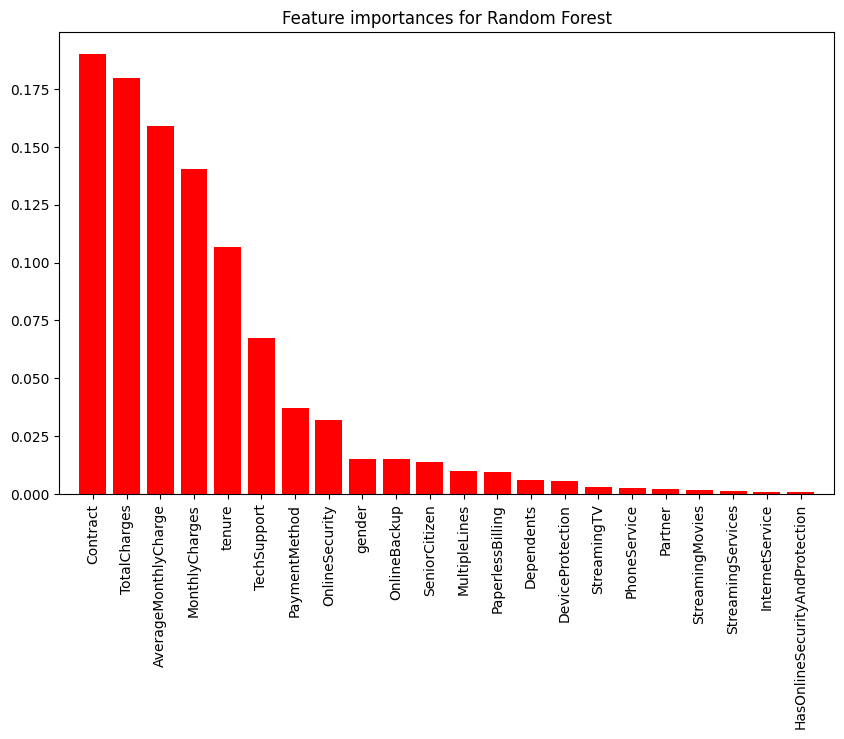

Feature ranking for Gradient Boosting:
1. feature 14 (0.190045)
2. feature 18 (0.179655)
3. feature 21 (0.158963)
4. feature 17 (0.140301)
5. feature 4 (0.106890)
6. feature 11 (0.067413)
7. feature 16 (0.037125)
8. feature 8 (0.031774)
9. feature 0 (0.015153)
10. feature 9 (0.014973)
11. feature 1 (0.013795)
12. feature 6 (0.010021)
13. feature 15 (0.009460)
14. feature 3 (0.006155)
15. feature 10 (0.005753)
16. feature 12 (0.003045)
17. feature 5 (0.002473)
18. feature 2 (0.002075)
19. feature 13 (0.001891)
20. feature 19 (0.001231)
21. feature 7 (0.001036)
22. feature 20 (0.000772)


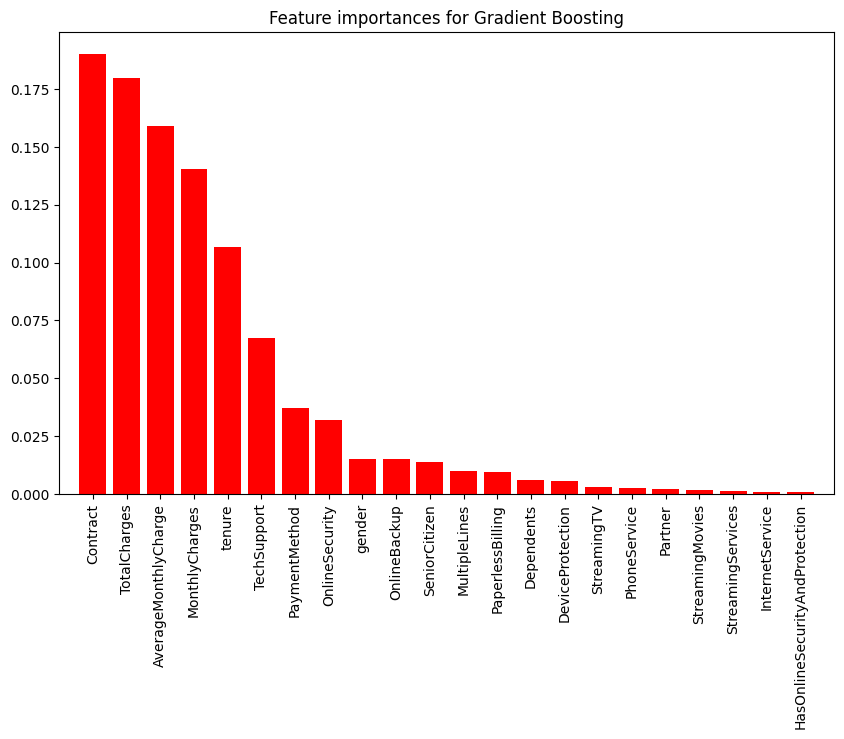

In [146]:
# Feature Importance for Random Forest
importances_ranf = classifier.feature_importances_
feature_names = X_train.columns
indices_ranf = np.argsort(importances_ranf)[::-1]

# Print the feature ranking
print("Feature ranking for Random Forest:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices_ranf[f], importances_ranf[indices_ranf[f]]))

# Plot the feature importances of the forest
plt.figure(figsize=(10, 6))
plt.title("Feature importances for Random Forest")
plt.bar(range(X_train.shape[1]), importances_ranf[indices_ranf],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices_ranf], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Feature Importance for Gradient Boosting
importances_gb = classifier.feature_importances_
indices_gb = np.argsort(importances_gb)[::-1]

# Print the feature ranking
print("Feature ranking for Gradient Boosting:")

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices_gb[f], importances_gb[indices_gb[f]]))

# Plot the feature importances of the Gradient Boosting
plt.figure(figsize=(10, 6))
plt.title("Feature importances for Gradient Boosting")
plt.bar(range(X_train.shape[1]), importances_gb[indices_gb],
       color="r", align="center")
plt.xticks(range(X_train.shape[1]), feature_names[indices_gb], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()

**Task 5: Hyperparameter Tuning**

In [147]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [148]:

# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf', 'linear']}

# Create a GridSearchCV object
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

# Fit the grid search to the training data
grid.fit(X_train, y_train)

# Print the best parameters and the best score
print(grid.best_params_)
print(grid.best_estimator_)

# Evaluate the model with the best parameters on the test data
y_pred_grid = grid.predict(X_test)
print(classification_report(y_test, y_pred_grid))
joblib.dump(grid, 'models/best_model.pkl')


Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.741 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.741 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.737 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.737 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.754 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.759 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.776 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.737 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.807 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.772 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.741 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf

['models/best_model.pkl']

The following hyperparameters were tuned for the Support Vector Classifier (SVC) model using GridSearchCV:

Regularization parameter.
C: It controls the trade-off between maximizing the margin and minimizing the classification error.

    - Possible values: [0.1, 1, 10, 100]

gamma: Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.

    - Possible values: [1, 0.1, 0.01, 0.001]

kernel: Specifies the kernel type to be used in the algorithm.

    - Possible values: ['rbf', 'linear']

GridSearchCV systematically explored different combinations of these hyperparameters, evaluating the model's performance for each combination using cross-validation.
The goal was to find the optimal set of hyperparameters that yielded the best performance on unseen data.

The final model was trained with the best-performing set of hyperparameters as determined by GridSearchCV. This process ensures that the model is optimized for the specific dataset and task at hand, achieving better overall performance compared to a model
using default hyperparameters.

By utilizing these optimal parameters, the model is expected to achieve better accuracy, precision, recall, and F1-score on the test dataset.

In [149]:
print("Original SVC Model Classification Report:")
print(classification_report(y_test, final_y_pred))

print("\nTuned SVC Model Classification Report (GridSearchCV):")
print(classification_report(y_test, y_pred_grid))


Original SVC Model Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        52
           1       0.86      0.60      0.71        20

    accuracy                           0.86        72
   macro avg       0.86      0.78      0.81        72
weighted avg       0.86      0.86      0.85        72


Tuned SVC Model Classification Report (GridSearchCV):
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        52
           1       0.75      0.75      0.75        20

    accuracy                           0.86        72
   macro avg       0.83      0.83      0.83        72
weighted avg       0.86      0.86      0.86        72



But in the above case we can see that the accuracy is decreased. There can be many reasons for this like overfitting, very less dataset, etc.

**Task 6: Conclusion and Recommendations**

Conclusion:

Through our exploratory data analysis (EDA) and subsequent model building, we gained valuable insights into customer churn prediction.

Multiple classification models were explored, including Logistic Regression, KNN, SVM, Naive Bayes, Decision Tree, Random Forest, and Gradient Boosting. Among them, Support Vector Classifier (SVC) model delivered the highest accuracy and other metrics. However, the SVC model's accuracy showed a slight decrease after hyperparameter tuning, highlighting potential complexities like overfitting or limited data availability

Recommendations:

Offer tailored retention strategies based on identified risk factors like contract type, services used, and tenure.

**Feature Engineering:** Explore generating new features that could better capture the relationship between existing variables and customer churn. These could include interaction terms, ratio features, or polynomial features.

**Advanced Feature Selection Techniques:** Employ techniques like recursive feature elimination or feature importance scores to identify and focus on the most relevant features for predicting churn.

**Handling Imbalanced Data:** Utilize techniques like oversampling the minority class or using weighted loss functions to address the potential imbalance between churned and retained customers in the dataset.

**Domain Expertise Collaboration:** Integrate insights and feedback from domain experts (e.g., business analysts) to understand potential business-specific factors impacting churn, leading to targeted feature selection and model improvements.

**Task 7: Model Deployment (Hands-on)**

The model is deployed on Render.com 
The deployed url is:- https://mastersoftassignment-nirmika.onrender.com/

The prediction route is https://mastersoftassignment-nirmika.onrender.com/predict
This is the POST request which will return the prediction.

The sample JSON body and the output is given below:-

{
  "gender": "Female",
  "SeniorCitizen": 0,
  "Partner": "Yes",
  "Dependents": "Yes",
  "tenure": 36,
  "PhoneService": "Yes",
  "MultipleLines": "Yes",
  "InternetService": "Fiber optic",
  "OnlineSecurity": "Yes",
  "OnlineBackup": "Yes",
  "DeviceProtection": "No",
  "TechSupport": "Yes",
  "StreamingTV": "Yes",
  "StreamingMovies": "Yes",
  "Contract": "Month-to-month",
  "PaperlessBilling": "Yes",
  "PaymentMethod": "Electronic check",
  "MonthlyCharges": 108.4,
  "TotalCharges": 3885.6
}

Result:-

{
    "prediction": "Customer will not churn"
}


